In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

#Dataset :
Seoul Bike Sharing Demand [Dataset]. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5F62R.



In [3]:
dataset_cols = ["bike_count","hour","temp","humidity","wind","visibility","dew_pt_temp","radiation","rain","snow","functional"]
df = pd.read_csv("SeoulBikeData.csv").drop(["Date","Holiday","Seasons"],axis = 1)

In [4]:
df.columns = dataset_cols

In [5]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [6]:
df["functional"] = (df["functional"]== "Yes").astype(int)
df = df[df["hour"]==12]
df = df.drop(["hour"],axis =1 )

In [7]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


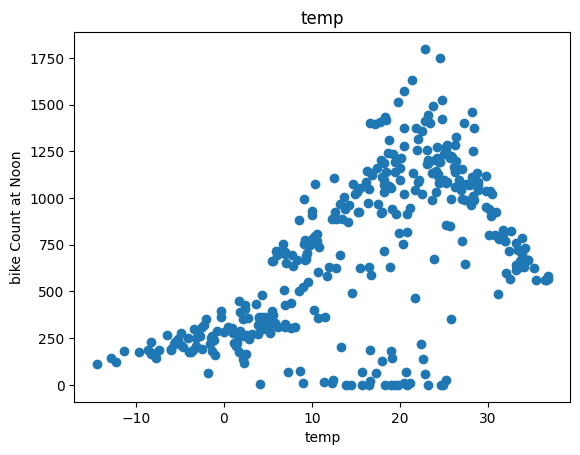

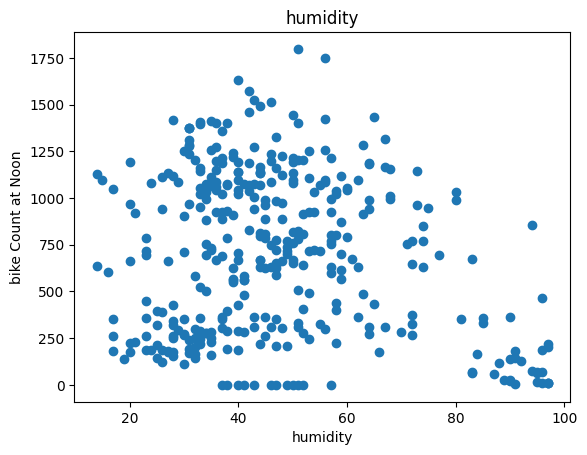

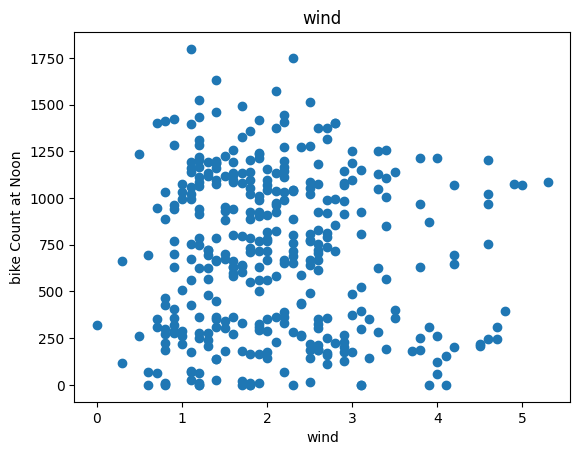

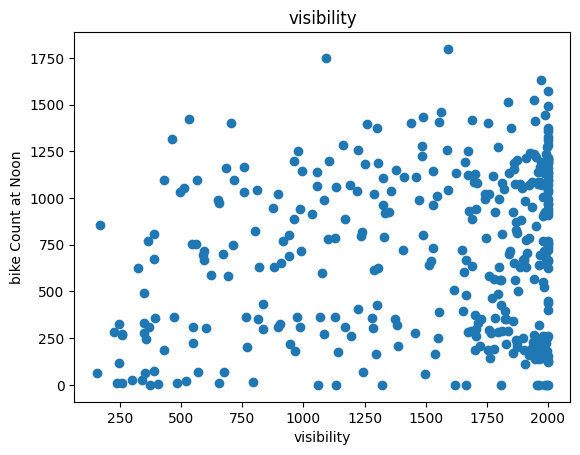

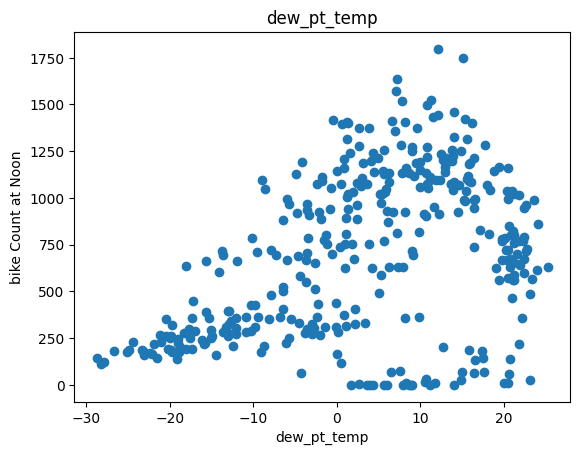

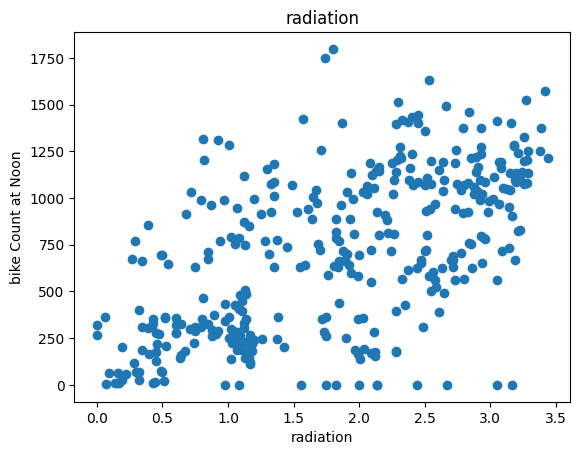

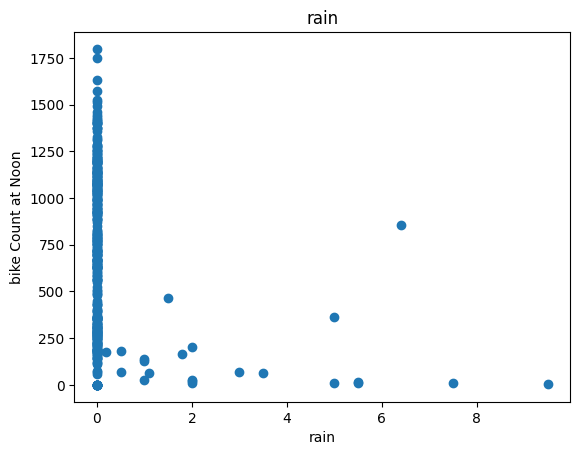

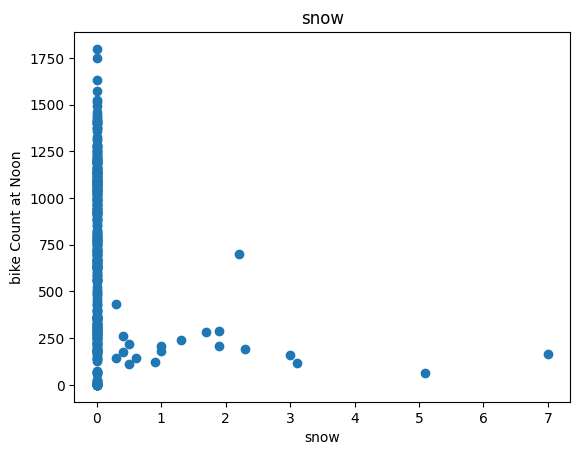

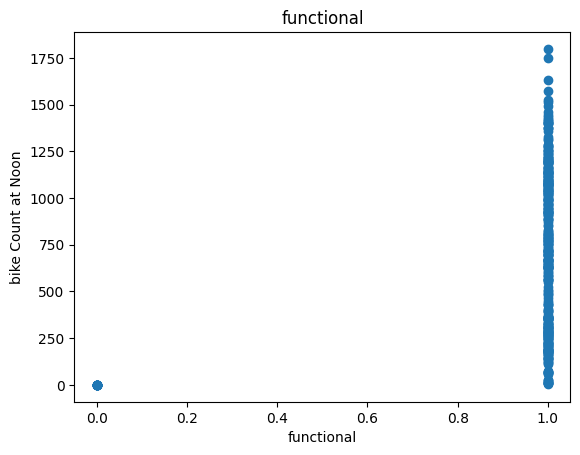

In [8]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["bike_count"])
  plt.title(label)
  plt.ylabel("bike Count at Noon")
  plt.xlabel(label)
  plt.show()

In [9]:
df = df.drop(["wind","visibility","functional"],axis= 1)

In [10]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


#Train/valid/test dataset

In [11]:
train , val , test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [12]:
def get_xy(dataframe, y_label, x_labels = None):
  dataframe = copy.deepcopy(dataframe)
  if not x_labels:
    x = dataframe[[c for c in dataframe.columns if c != y_label]].values
  else:
    if len(x_labels) == 1:
      x = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      x = dataframe[x_labels].values
  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((x,y))
  return data,x,y

In [13]:
_,x_train_temp,y_train_temp = get_xy(train,"bike_count",x_labels=["temp"])
_,x_val_temp,y_val_temp = get_xy(val,"bike_count",x_labels=["temp"])
_,x_test_temp,y_test_temp = get_xy(test,"bike_count",x_labels=["temp"])

In [14]:
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp,y_train_temp)

LinearRegression()

In [15]:
print(temp_reg.coef_,temp_reg.intercept_)

[[21.96988989]] [343.74274753]


In [16]:
temp_reg.score(x_test_temp, y_test_temp)

0.2561018153315653

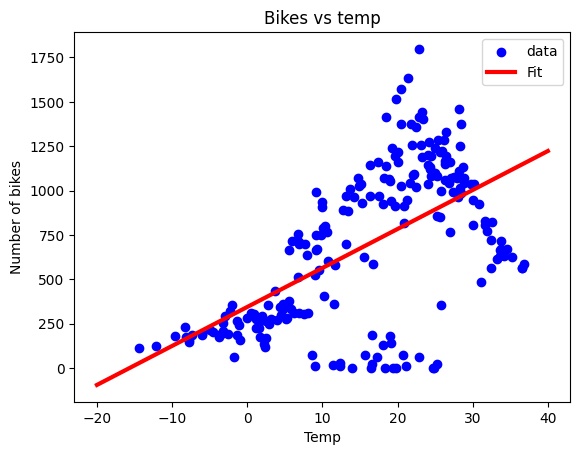

In [17]:
plt.scatter(x_train_temp,y_train_temp, label="data",color = "blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)),label="Fit",color = "red", linewidth = 3)
plt.legend()
plt.title("Bikes vs temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

#multiple linear regression

In [18]:
def get_xy_all(dataframe, y_label, x_labels = None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    x = dataframe[[c for c in dataframe.columns if c != y_label]].values
  else:
    if len(x_labels) == 1:
      x = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      x = dataframe[x_labels].values
  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((x,y))
  return data,x,y

In [19]:
train , val , test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])
_,x_train_all,y_train_all = get_xy_all(train,"bike_count",x_labels=df.columns[1:])
_,x_val_all,y_val_all = get_xy_all(val,"bike_count",x_labels=df.columns[1:])
_,x_test_all,y_test_all = get_xy_all(test,"bike_count",x_labels=df.columns[1:])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [20]:
all_reg = LinearRegression()
all_reg.fit(x_train_all,y_train_all)

LinearRegression()

In [21]:
all_reg.score(x_test_all,y_test_all)

0.4053103490887787

#regression with neural Net

In [22]:
def plot_loss(history):
  plt.plot(history.history['loss'],label= 'loss')
  plt.plot(history.history['val_loss'],label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [23]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis = None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
    ])

In [25]:
temp_nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),loss = 'mean_squared_error')

In [26]:
history = temp_nn_model.fit(
    x_train_temp.reshape(-1),y_train_temp,
    verbose = 0,
    epochs = 1000,
    validation_data = (x_val_temp,y_val_temp)
)

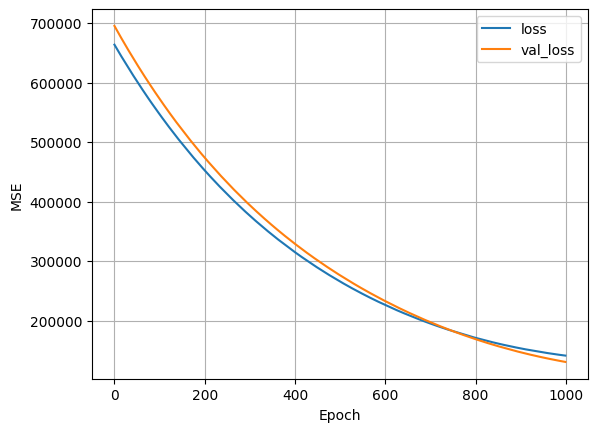

In [27]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


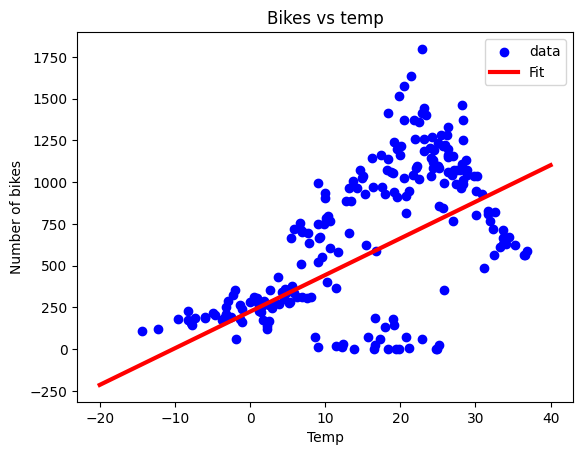

In [28]:
plt.scatter(x_train_temp,y_train_temp, label="data",color = "blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1,1)),label="Fit",color = "red", linewidth = 3)
plt.legend()
plt.title("Bikes vs temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

#neural net

In [29]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis = None)
temp_normalizer.adapt(x_train_temp.reshape(-1))
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'relu'),
    ])
nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),loss = 'mean_squared_error')

In [30]:
history = nn_model.fit(
    x_train_temp,y_train_temp,
    validation_data = (x_val_temp,y_val_temp),
    verbose = 0,
    epochs = 100
)

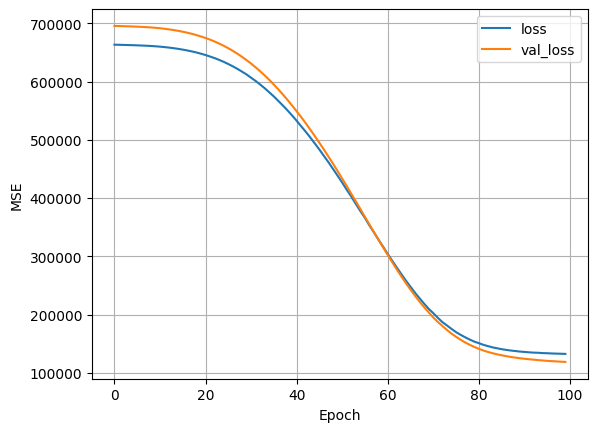

In [31]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


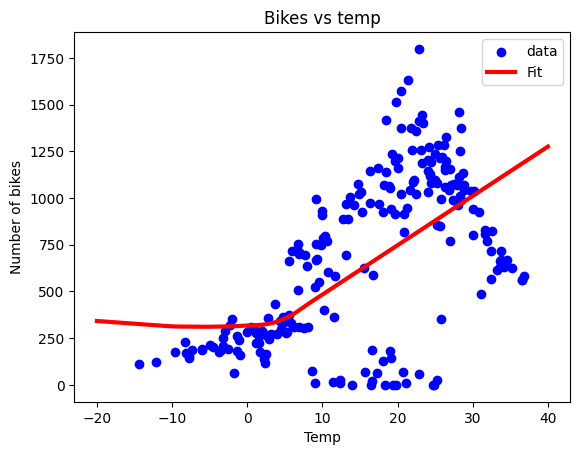

In [32]:
plt.scatter(x_train_temp,y_train_temp, label="data",color = "blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x,nn_model.predict(np.array(x).reshape(-1,1)),label="Fit",color = "red", linewidth = 3)
plt.legend()
plt.title("Bikes vs temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

#multi

In [33]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis = None)
all_normalizer.adapt(x_train_all.reshape(-1))


In [34]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(1)
    ])
nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),loss = 'mean_squared_error')

In [35]:
history = nn_model.fit(
    x_train_all,y_train_all,
    validation_data = (x_val_all,y_val_all),
    verbose = 0,
    epochs = 100
)

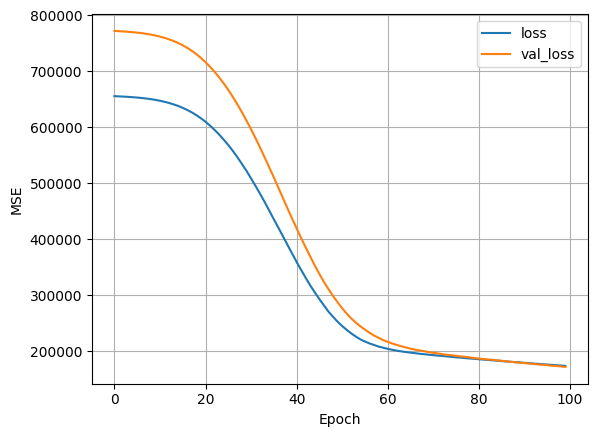

In [36]:
plot_loss(history)

#calculating the MSE for both linear reg and nn

In [37]:
y_pred_lr = all_reg.predict(x_test_all)
y_pred_nn = nn_model.predict(x_test_all)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [38]:
def MSE(y_pred,y_real):
  return (np.square(y_pred - y_real)).mean()

In [39]:
MSE(y_pred_lr,y_test_all)

115399.58121767295

In [40]:
MSE(y_pred_nn,y_test_all)

199067.84845729926

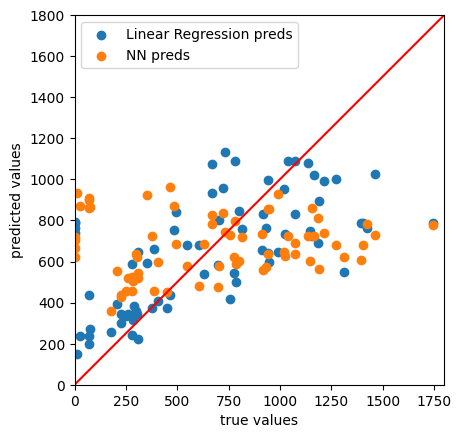

In [41]:
ax = plt.axes(aspect='equal')
plt.scatter(y_test_all, y_pred_lr, label='Linear Regression preds')
plt.scatter(y_test_all, y_pred_nn, label='NN preds')
plt.xlabel("true values")
plt.ylabel("predicted values")
lims = [0,1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims,c = "red")